# K-Nearest Neighbors (KNN) Tutorial with Iris Dataset

This tutorial introduces the K-Nearest Neighbors (KNN) algorithm and demonstrates its application using the Iris dataset. The Iris dataset, a widely used benchmark in machine learning, comprises measurements of four features from three different species of iris flowers. The tutorial covers essential steps including importing necessary libraries, loading and preparing the dataset, initializing and training the KNN classifier, making predictions, and evaluating the model's performance through accuracy calculation and a classification report. Additionally, guidance is provided on how to select an appropriate 'k' value for optimal model performance. This tutorial aims to provide a comprehensive introduction to KNN and serve as a foundation for further exploration in machine learning.




### 1. **Basic Idea**:

   - KNN is a **lazy learner** algorithm. This means it doesn't learn a discriminative function from the training data but instead memorizes the entire dataset.
   - The core idea is to find the 'K' training samples that are closest to the point you want to predict, and then make predictions based on their labels (for classification) or their values (for regression).

### 2. **How it Works**:

   - **Step 1**: Choose the number of neighbors, 'K'.
   - **Step 2**: Compute the distance between the point you want to classify and all other points in the dataset. Common distance metrics include Euclidean, Manhattan, Minkowski, etc.
   - **Step 3**: Sort the distances in ascending order and select the top 'K' samples.
   - **Step 4**: For classification, assign the class that occurs most frequently among the 'K' nearest neighbors. For regression, compute the average (or weighted average) of the 'K' nearest neighbor values.

### 3. **Parameters**:

   - **K**: The number of neighbors to consider. This is a crucial parameter and should be chosen carefully. A small 'K' can make the model sensitive to noise, while a large 'K' might smooth out important patterns.

### 4. **Distance Metrics**:

   - Euclidean distance is the most commonly used, but other metrics like Manhattan, Minkowski, Hamming, etc., can also be used depending on the nature of the data.

### 5. **Advantages**:

   - Easy to understand and implement.
   - Non-parametric (doesn't assume any underlying data distribution).
   - Can handle multiclass cases.

### 6. **Disadvantages**:

   - Computationally expensive during prediction, especially with large datasets.
   - Sensitive to the choice of distance metric and the value of 'K'.
   - Doesn't work well with high-dimensional data (curse of dimensionality).

### 7. **Use Cases**:

   - KNN is used in various domains including **recommendation systems, image recognition, and anomaly detection**. It's also used in areas like **bioinformatics, finance, and healthcare**.

### 8. **Tips for Using KNN**:

   - Standardizing the data (mean = 0, variance = 1) can improve KNN's performance.
   - Choosing the right 'K' through techniques like cross-validation is crucial.
   - It's often a good idea to explore different distance metrics to see which one works best for your data.

### 9. **Possible Improvements**:

   - Using more sophisticated distance weighting schemes.
   - Implementing faster search algorithms to find nearest neighbors in large datasets.
   - Applying dimensionality reduction techniques before using KNN.

### 10. **Extensions**:

   - There are variants like **weighted KNN, radius-based KNN (RKNN), and kernelized KNN** that adapt the basic algorithm to different situations.


### 11. **When to Choose K-Nearest Neighbors**:

   - **Small to Medium Sized Datasets**: KNN can perform well on datasets with a relatively small number of samples. For very large datasets, the computational cost of finding nearest neighbors can become prohibitive.

   - **Non-Linear Data**: KNN can capture complex, non-linear relationships between features. If the decision boundary is irregular or doesn't follow a clear mathematical pattern, KNN can be a good choice.

   - **Noisy Data**: KNN can be robust to noisy training data because it doesn't assume any underlying data distribution. It makes predictions based on the actual data points, not on a learned model.

   - **Interpretability**: If interpretability and explainability of the model are crucial, KNN is a good choice. It's easy to understand and doesn't involve complex mathematical operations.

   - **Quick Prototyping and Baseline Model**: KNN is a good algorithm for quickly prototyping a solution or establishing a baseline performance. It can serve as a simple benchmark against which more complex models can be compared.

   - **Ensemble Methods**: KNN can also be used as a component in ensemble methods like **bagging** or **stacking**, where it can provide diversity to the ensemble.

### 12. **When NOT to Choose K-Nearest Neighbors**:

   - **High-Dimensional Data**: KNN doesn't perform well in high-dimensional spaces. As the number of features increases, the "nearest" points tend to be farther away, making the algorithm less effective.

   - **Imbalanced Datasets**: KNN can be biased towards the majority class in imbalanced datasets. Techniques like resampling or using a different algorithm might be more appropriate.

   - **Computational Efficiency**: If computational efficiency is a major concern (especially during prediction), KNN might not be the best choice, as it can be slow for large datasets.

   - **Feature Engineering**: If feature engineering is a critical part of your modeling process, more complex models may be better suited. KNN doesn't inherently learn feature relationships.

   - **Sensitive to Distance Metric**: If choosing an appropriate distance metric is a challenge (e.g., in text or categorical data), other models that handle such data types better might be more suitable.




In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Initialize the KNN Classifier with k=3 (you can change k as per your preference)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [4]:
# Predict on the test set
y_pred = knn.predict(X_test)


In [5]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(f'Classification Report:\n{report}')


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



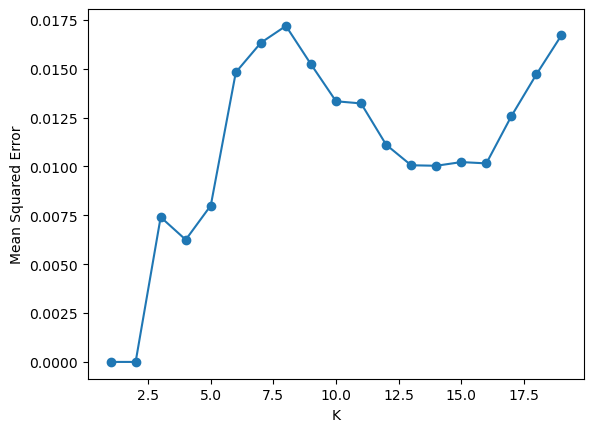

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
error = []

for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

plt.plot(range(1, 20), error, marker='o')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.show()
